## Clustering exercises 

Marcelo Avila / Nov. 2024

---- 

In [1]:
# imports
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

#froms
from matplotlib.patches import Circle, ConnectionPatch
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist, squareform
from scipy.stats import norm
from sklearn.cluster import KMeans,AgglomerativeClustering,DBSCAN
from sklearn.datasets import make_blobs,make_moons
from sklearn.metrics import silhouette_score,calinski_harabasz_score, davies_bouldin_score
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler

# Set random seed and style
np.random.seed(42)

## Read the data

In [2]:
df1 = pd.read_csv("data1.csv")
df2 = pd.read_csv("data2.csv")
df3 = pd.read_csv("data3.csv")
df4 = pd.read_csv("data4.csv")

In [33]:
def plot_data_points(df, x_col, y_col, color_col='color', title=""):
    # Plotting initial data
    plt.figure(figsize=(6, 6))
    scatter = plt.scatter(df[x_col], df[y_col], s=20, c=df[color_col], marker="o", alpha=.1)
    
    plt.title(title)
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.legend(*scatter.legend_elements(), title="Color Label")
    
    plt.show()

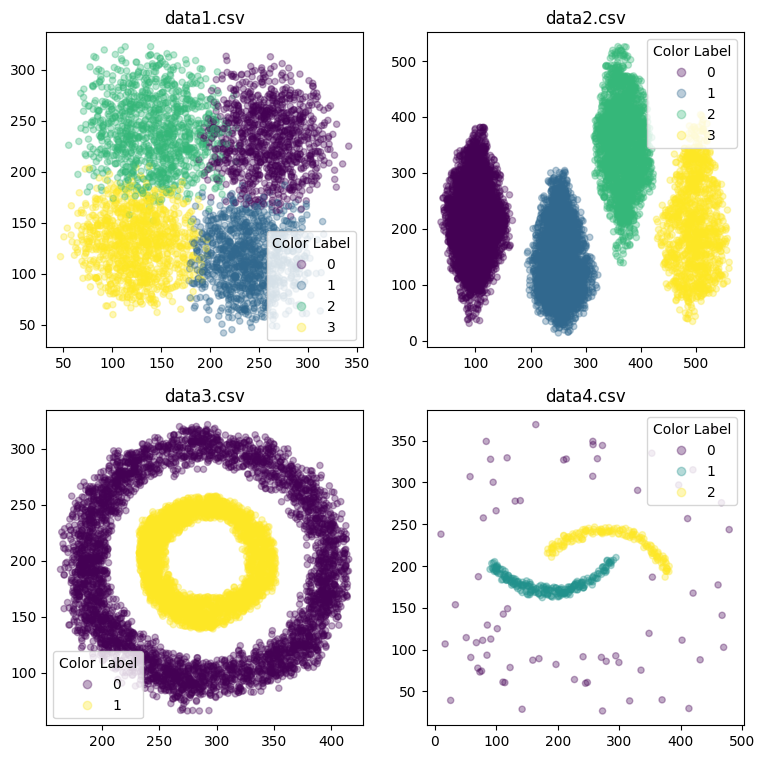

In [47]:
# Visualize the clusters
plt.figure(figsize=(9, 9))
plt.subplot(2, 2, 1)
sc = plt.scatter(df1["x"], df1["y"], s=20, c=df1["color"], marker="o", alpha=1/3)
plt.title("data1.csv")
plt.legend(*sc.legend_elements(), title="Color Label")

plt.subplot(2, 2, 2)
sc = plt.scatter(df2["x"], df2["y"], s=20, c=df2["color"], marker="o", alpha=1/3)
plt.title("data2.csv")
plt.legend(*sc.legend_elements(), title="Color Label")

plt.subplot(2, 2, 3)
sc = plt.scatter(df3["x"], df3["y"], s=20, c=df3["color"], marker="o", alpha=1/3)
plt.title("data3.csv")
plt.legend(*sc.legend_elements(), title="Color Label")

plt.subplot(2, 2, 4)
sc = plt.scatter(df4["x"], df4["y"], s=20, c=df4["color"], marker="o", alpha=1/3)
plt.title("data4.csv")
plt.legend(*sc.legend_elements(), title="Color Label")

plt.show()

In [5]:
def plot_all(df, dict_labels,marker='o', alpha=1/3, s=10):
    
    # Visualize the clusters
    plt.figure(figsize=(9, 9))
    
    # subplot 1
    plt.subplot(2, 2, 1)
    sc = plt.scatter(
        df.x, df.y, s=s, c=df.color, label='Data Points', marker=marker, alpha=alpha
    )
    plt.legend(*sc.legend_elements(), title="Actual Label")
    plt.title('Before clustering')

    # subplot 2
    plt.subplot(2, 2, 2)
    sc = plt.scatter(
        df.x, df.y, s=s, c=dict_labels["kmeans"], label='Data Points', marker=marker, alpha=alpha
    )
    plt.legend(*sc.legend_elements(), title="Predicted Label")
    plt.title('k-means')

    # subplot 3
    plt.subplot(2, 2, 3)
    sc = plt.scatter(
        df.x, df.y, s=s, c=dict_labels["dbscan"], label='Data Points', marker=marker, alpha=alpha
    )
    plt.legend(*sc.legend_elements(), title="Predicted Label")
    plt.title('dbscan')

    # subplot 4
    plt.subplot(2, 2, 4)
    sc = plt.scatter(
        df.x, df.y, s=s, c=dict_labels["gausmix"], label='Data Points', marker=marker, alpha=alpha
    )
    plt.legend(*sc.legend_elements(), title="Predicted Label")
    plt.title('Gaussian Mixture')

    plt.show()

## DF1

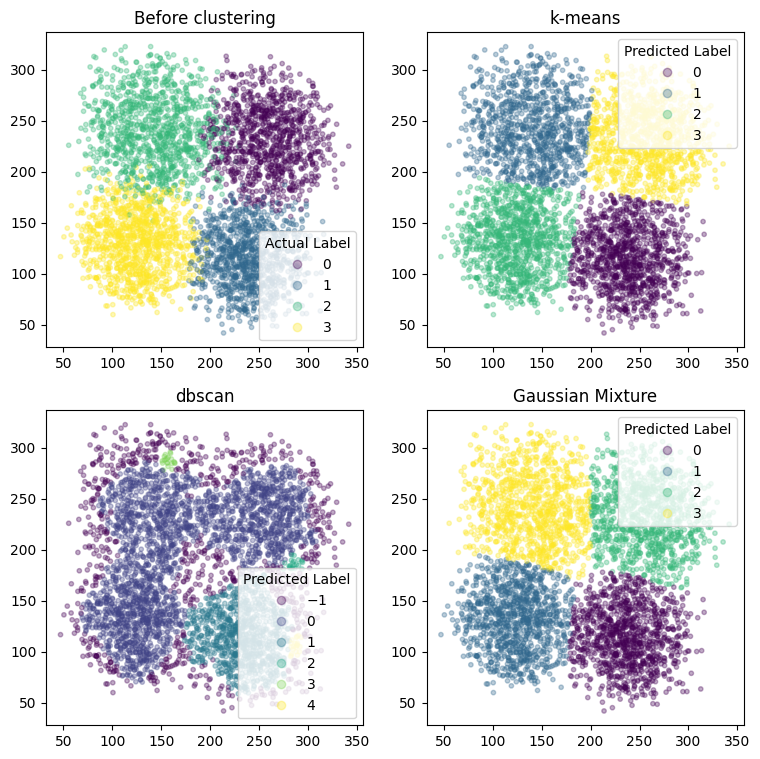

In [6]:
# K-Means Clustering
n_clusters = 4
df1_kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(df1.drop("color", axis=1))
df1_labels = {"kmeans": df1_kmeans.labels_}
# DBSCAN Clustering
df1_dbscan = DBSCAN(eps=2**3, min_samples=2**4).fit(df1.drop("color", axis=1))
df1_labels.update({"dbscan": df1_dbscan.labels_})
# Gaussian Mixture
X_df1 = df1[['x', 'y']].to_numpy()
gmm = GaussianMixture(n_components=n_clusters)  # Specify the number of components
gmm.fit(X_df1)
df1_labels.update({"gausmix": gmm.predict(X_df1)})

plot_all(df1, df1_labels)

Comments: 
- dbscan is quite sensitive to the paramenters selected.  Often if assigns all points to one cluster, or all points as "noise" data points. 

## DF2

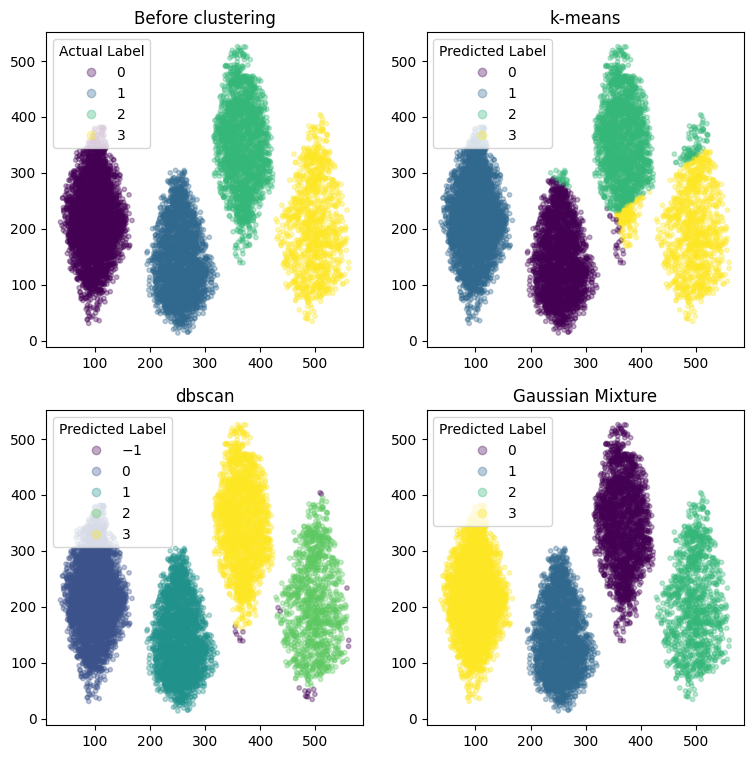

In [41]:
# K-Means Clustering
n_clusters = 4
df2_kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(df2.drop("color", axis=1))
df2_labels = {"kmeans": df2_kmeans.labels_}
# DBSCAN Clustering
df2_dbscan = DBSCAN(eps=2**4, min_samples=2**4).fit(df2.drop("color", axis=1))
df2_labels.update({"dbscan": df2_dbscan.labels_})
# Gaussian Mixture
X_df2 = df2[['x', 'y']].to_numpy()
gmm = GaussianMixture(n_components=n_clusters)  # Specify the number of components
gmm.fit(X_df2)
df2_labels.update({"gausmix": gmm.predict(X_df2)})

plot_all(df2, df2_labels)

## DF3

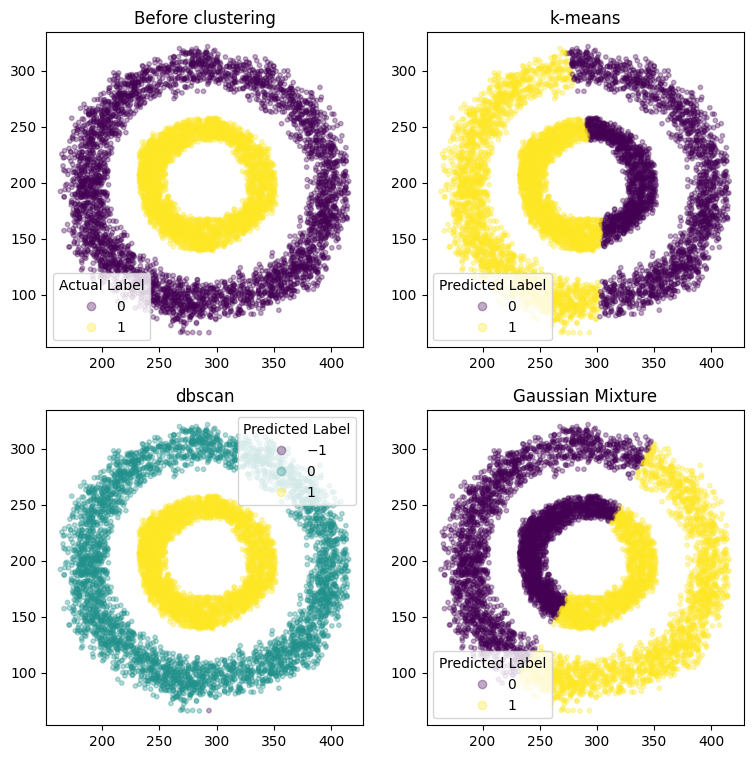

In [43]:
# K-Means Clustering
n_clusters = 2
df3_kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(df3.drop("color", axis=1))
df3_labels = {"kmeans": df3_kmeans.labels_}
# DBSCAN Clustering
df3_dbscan = DBSCAN(eps=2**4, min_samples=2**4).fit(df3.drop("color", axis=1))
df3_labels.update({"dbscan": df3_dbscan.labels_})
# Gaussian Mixture
X_df3 = df3[['x', 'y']].to_numpy()
gmm = GaussianMixture(n_components=n_clusters)  # Specify the number of components
gmm.fit(X_df3)
df3_labels.update({"gausmix": gmm.predict(X_df3)})

plot_all(df3, df3_labels)

### Transforming the data

The class seems to be a function of the distance to the center of the data points. So by calculating such distance we create a feature that alone can predict class quite well!

In [9]:
center_x = df3['x'].mean()
center_y = df3['y'].mean()
# calculate the euclidian distance of each point to the center. 
df3['dist'] = np.sqrt((df3['x'] - center_x)**2 + (df3['y'] - center_y)**2)

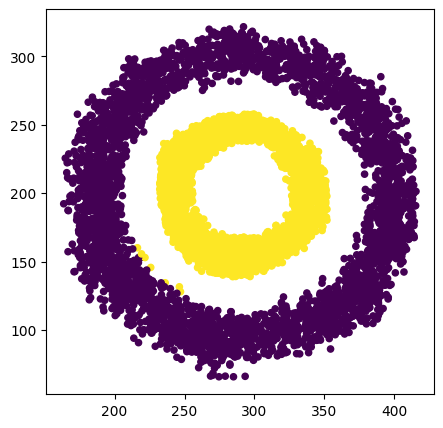

In [10]:
# K-Means Clustering
kmeans_diff = KMeans(n_clusters=2, random_state=10).fit(df3.drop(["color", "x", "y"], axis=1))
labels_kmeans_diff = kmeans_diff.labels_
plt.figure(figsize=(5, 5))
plt.scatter(df3.x, df3.y, s=20, c=labels_kmeans_diff, label='Data Points')

BUT, actually, only the distance was used to cluster, using x1 and x2 makes it worse.

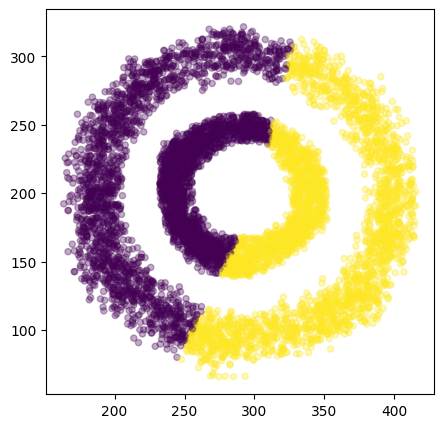

In [11]:
# K-Means Clustering
kmeans_diff = KMeans(n_clusters=2, random_state=10).fit(df3.drop(["color"], axis=1))
labels_kmeans_diff2 = kmeans_diff.labels_
plt.figure(figsize=(5, 5))
plt.scatter(df3.x, df3.y, s=20, c=labels_kmeans_diff2, label='Data Points', marker="o", alpha=1/3)

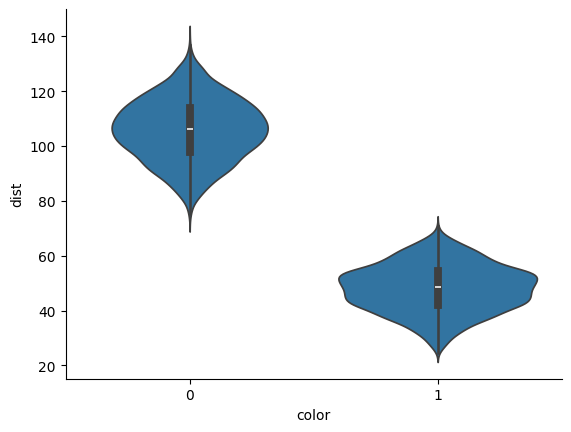

In [12]:
sns.violinplot(x = "color", y="dist", fill="color", data=df3)
sns.despine()

## DF4

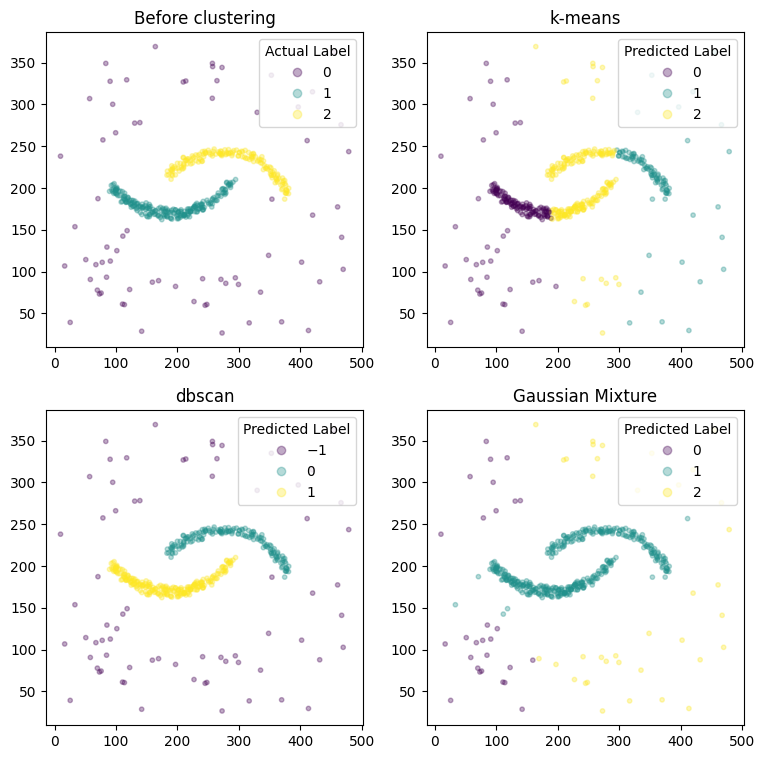

In [37]:
# K-Means Clustering
n_clusters = 3
df4_kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(df4.drop("color", axis=1))
df4_labels = {"kmeans": df4_kmeans.labels_}
# DBSCAN Clustering
df4_dbscan = DBSCAN(eps=2**3, min_samples=2**2).fit(df4.drop("color", axis=1))
df4_labels.update({"dbscan": df4_dbscan.labels_})
# Gaussian Mixture
X_df4 = df4[['x', 'y']].to_numpy()
gmm = GaussianMixture(n_components=n_clusters)  # Specify the number of components
gmm.fit(X_df4)
df4_labels.update({"gausmix": gmm.predict(X_df4)})

plot_all(df4, df4_labels)

## Exploring probabilities of cluster membership

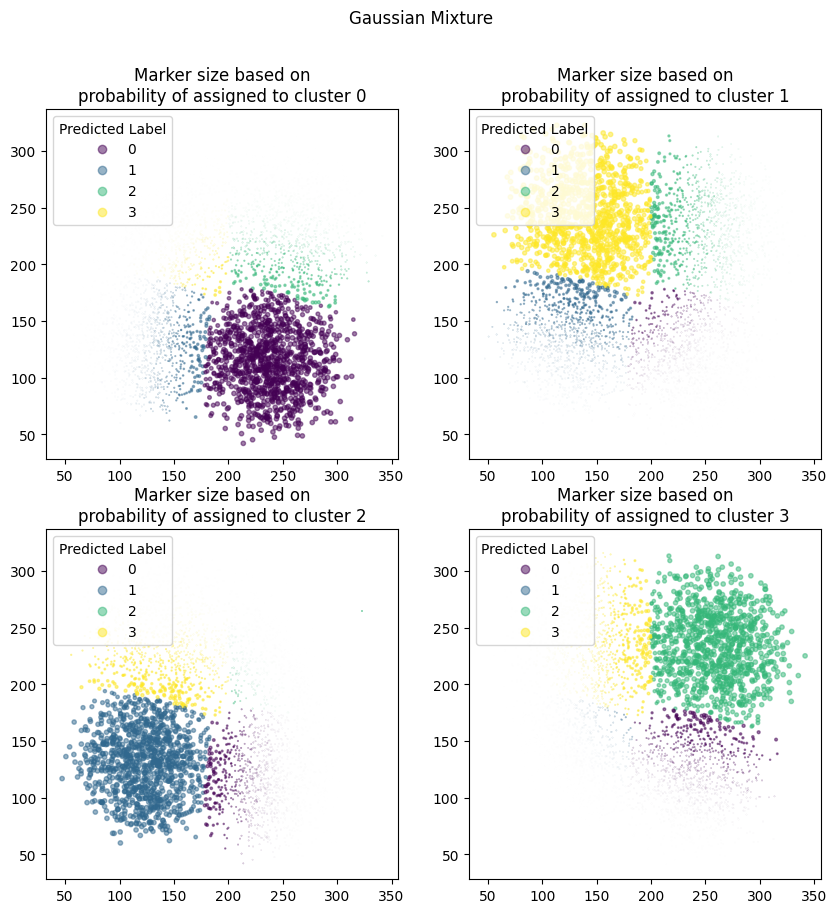

In [28]:
# rerun gaussian mixture
n_clusters = 4
gmm = GaussianMixture(n_components=n_clusters)  # Specify the number of components
gmm.fit(X_df1)
gmm_df1_proba = gmm.predict_proba(X_df1)

# plot
plt.figure(figsize=(10, 10))
for cat_i in range(4):
    plt.subplot(2, 2, cat_i+1)
    sc = plt.scatter(
        df1.x, df1.y, s=gmm_df1_proba[:,cat_i]*10, c=df1_labels["gausmix"], label='Data Points', marker="o", alpha=.5
    )
    plt.legend(*sc.legend_elements(), title="Predicted Label")
    plt.suptitle(f'Gaussian Mixture')
    plt.title(f'Marker size based on\nprobability of assigned to cluster {cat_i}')
plt.show()